In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib

In [2]:
df = pd.read_csv('Datasets/pizza.csv')

In [3]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [5]:
df.shape

(129, 9)

In [6]:
df.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [7]:
df.duplicated().any()

True

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().any()

False

In [10]:
df.describe()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,127,127,127,127,127,127,127,127,127
unique,5,43,12,12,20,6,2,2,2
top,C,"Rp72,000",12 inch,chicken,classic,medium,yes,yes,yes
freq,30,11,49,28,30,41,76,84,71


In [11]:
df.rename({'price_rupiah':'Price'}, axis=1, inplace=True)

In [12]:
df.head()

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [13]:
df['Price'] = df['Price'].str.replace("Rp", "")
df['Price'] = df['Price'].str.replace(",", "").astype('int32')
df.head()

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [14]:
def convert(value):
    return value*0.0119

In [15]:
df['Price'] = df['Price'].apply(convert)
df.head()

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,2796.5,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,2356.2,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,1428.0,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,1844.5,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,2951.2,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [18]:
df['diameter'] = df['diameter'].str.replace("inch", "")
df['diameter'] = df['diameter'].str.replace(" ", "").astype('float32')

In [19]:
df.head()

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,2796.5,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,2356.2,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,1428.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,1844.5,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,2951.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [20]:
df.columns

Index(['company', 'Price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [21]:
df.company.value_counts()

company
C    30
E    28
A    25
B    24
D    20
Name: count, dtype: int64

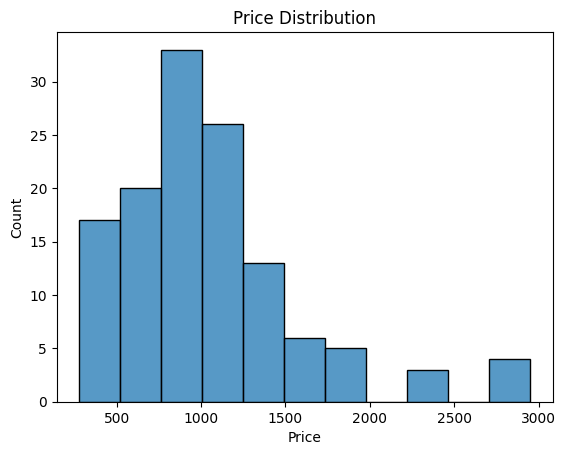

In [28]:
sns.histplot(data=df, x='Price')
plt.title('Price Distribution')

plt.show()

In [29]:
df.diameter.value_counts()

diameter
12.0    49
14.0    24
8.5     22
17.0     8
18.5     6
16.0     5
8.0      4
16.5     4
22.0     3
20.0     1
18.0     1
Name: count, dtype: int64

C:\Users\Sumit\AppData\Local\Temp\ipykernel_8960\2488915412.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diameter', palette='viridis')


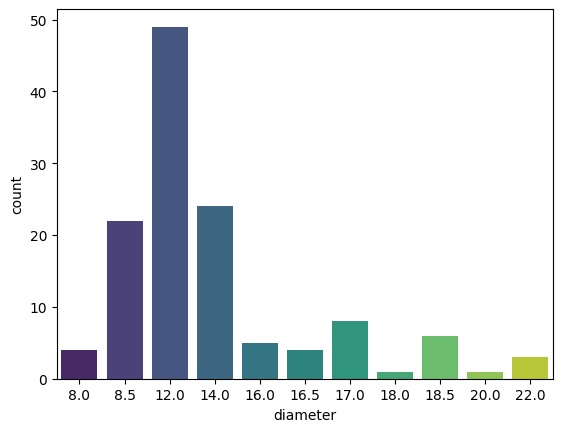

In [34]:
sns.countplot(data=df, x='diameter', palette='viridis')   
plt.show() 

In [35]:
df.topping.value_counts()

topping
chicken         28
mushrooms       22
mozzarella      20
smoked_beef     19
tuna             9
vegetables       9
meat             8
black_papper     3
sausage          3
beef             3
papperoni        2
onion            1
Name: count, dtype: int64

C:\Users\Sumit\AppData\Local\Temp\ipykernel_8960\3322465392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='topping', palette='viridis')


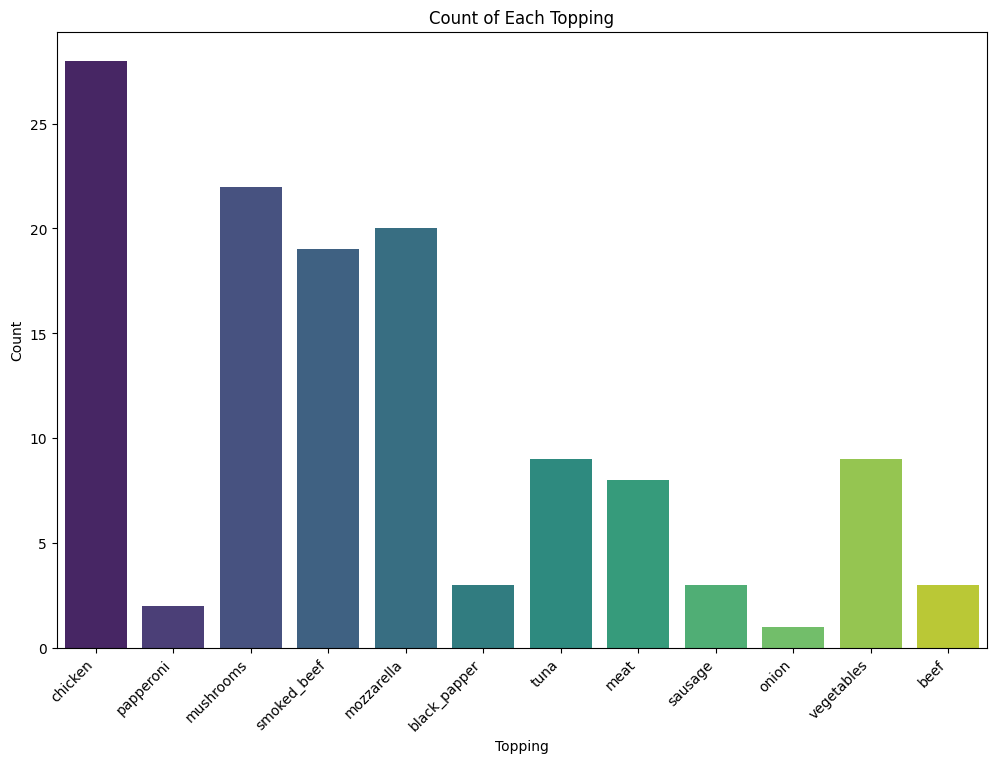

In [41]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.countplot(data=df, x='topping', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Count of Each Topping')
plt.xlabel('Topping')
plt.ylabel('Count')
plt.show()


In [42]:
df.variant.value_counts()

variant
classic              30
meat_lovers          10
double_mix           10
crunchy              10
double_decker         9
new_york              8
double_signature      5
american_favorite     5
BBQ_meat_fiesta       5
super_supreme         5
spicy_tuna            3
BBQ_sausage           3
extravaganza          3
meat_eater            3
gournet_greek         3
italian_veggie        3
thai_veggie           3
american_classic      3
neptune_tuna          3
spicy tuna            3
Name: count, dtype: int64

C:\Users\Sumit\AppData\Local\Temp\ipykernel_8960\1250791716.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='variant', palette='viridis')


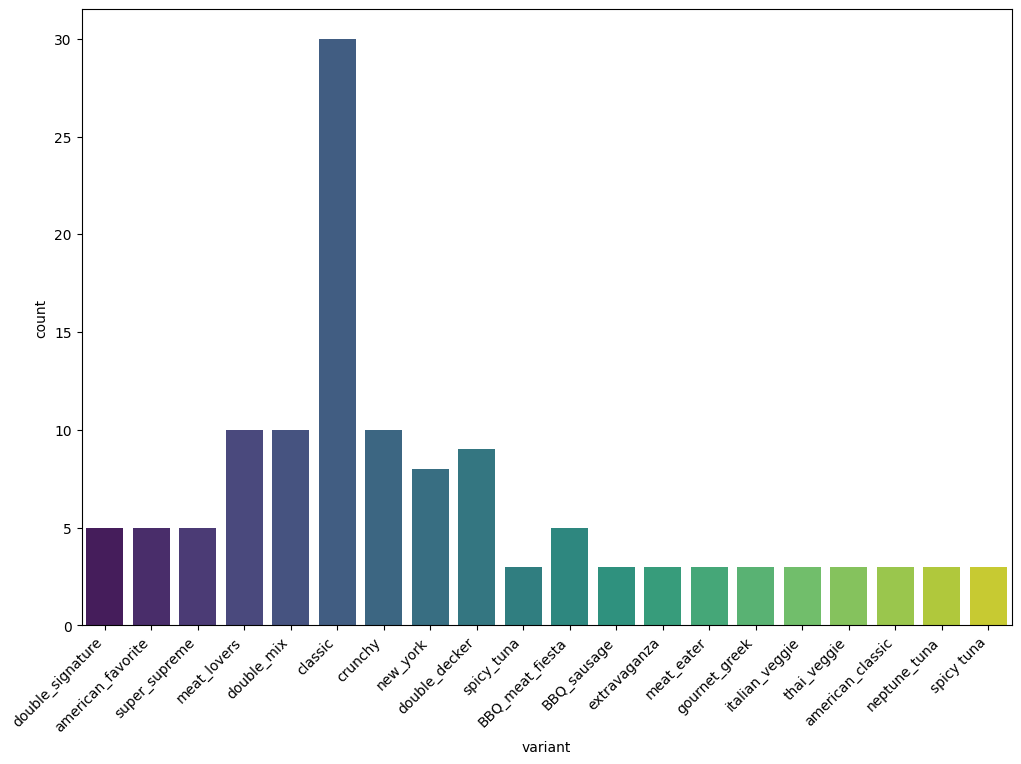

In [45]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.countplot(data=df, x='variant', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.show()

In [46]:
df['size'].value_counts()

size
medium     41
small      22
large      21
reguler    20
jumbo      15
XL          8
Name: count, dtype: int64

C:\Users\Sumit\AppData\Local\Temp\ipykernel_8960\107020847.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='size', palette='viridis')


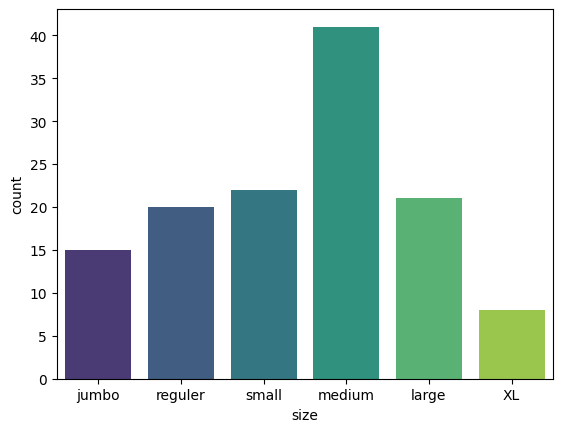

In [49]:
sns.countplot(data=df, x='size', palette='viridis')
plt.show()

C:\Users\Sumit\AppData\Local\Temp\ipykernel_8960\3756843814.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='extra_sauce', palette='viridis')


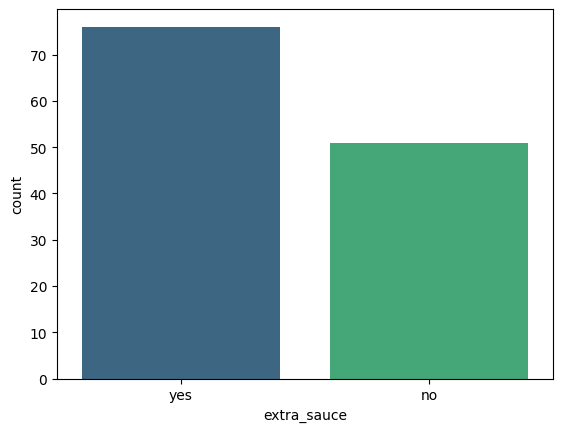

In [50]:
sns.countplot(data=df, x='extra_sauce', palette='viridis')
plt.show()

C:\Users\Sumit\AppData\Local\Temp\ipykernel_8960\3228306593.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='extra_cheese', palette='viridis')


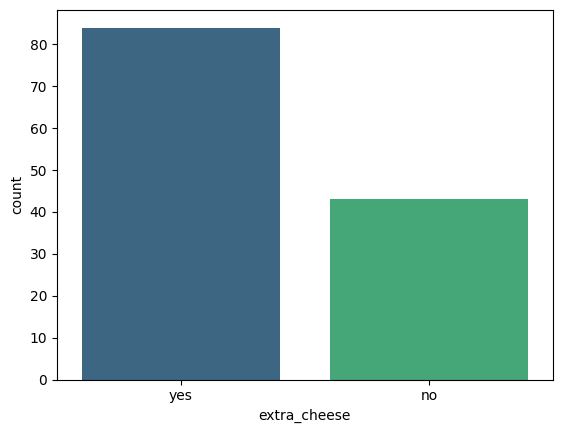

In [51]:
sns.countplot(data=df, x='extra_cheese', palette='viridis')
plt.show()

C:\Users\Sumit\AppData\Local\Temp\ipykernel_8960\4251546855.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='extra_mushrooms', palette='viridis')


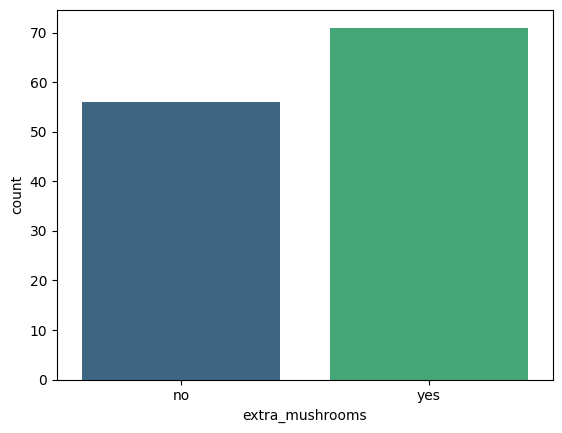

In [52]:
sns.countplot(data=df, x='extra_mushrooms', palette='viridis')
plt.show()

In [53]:
df.columns

Index(['company', 'Price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

C:\Users\Sumit\AppData\Local\Temp\ipykernel_8960\3672763188.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=x_col, y='Price', palette="viridis")


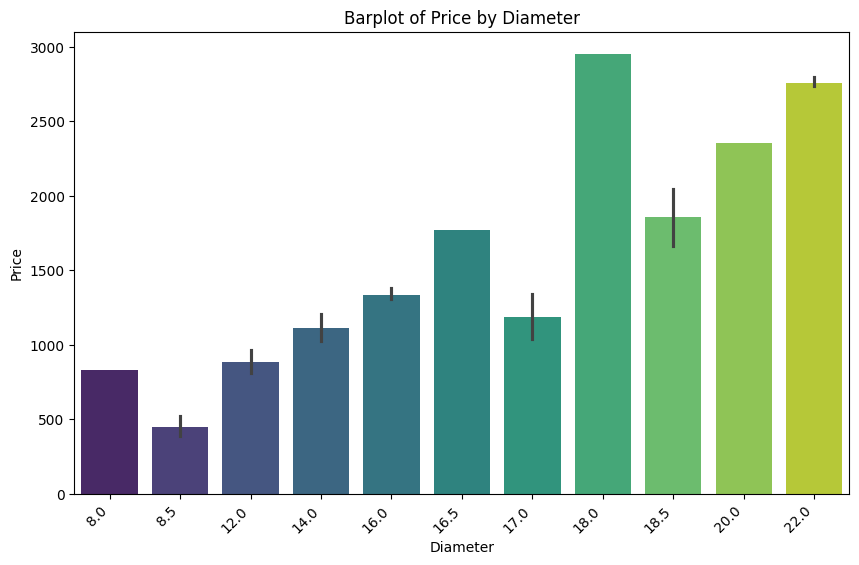

C:\Users\Sumit\AppData\Local\Temp\ipykernel_8960\3672763188.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=x_col, y='Price', palette="viridis")


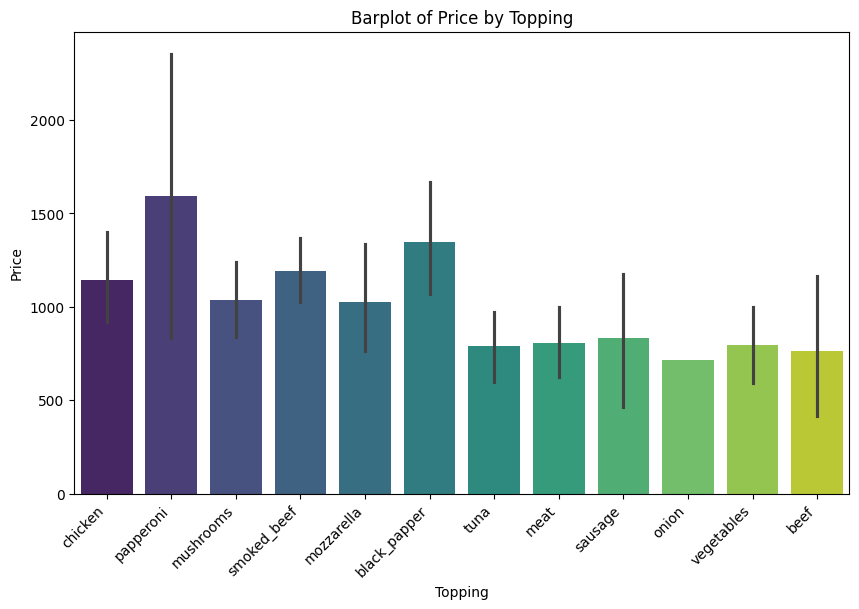

C:\Users\Sumit\AppData\Local\Temp\ipykernel_8960\3672763188.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=x_col, y='Price', palette="viridis")


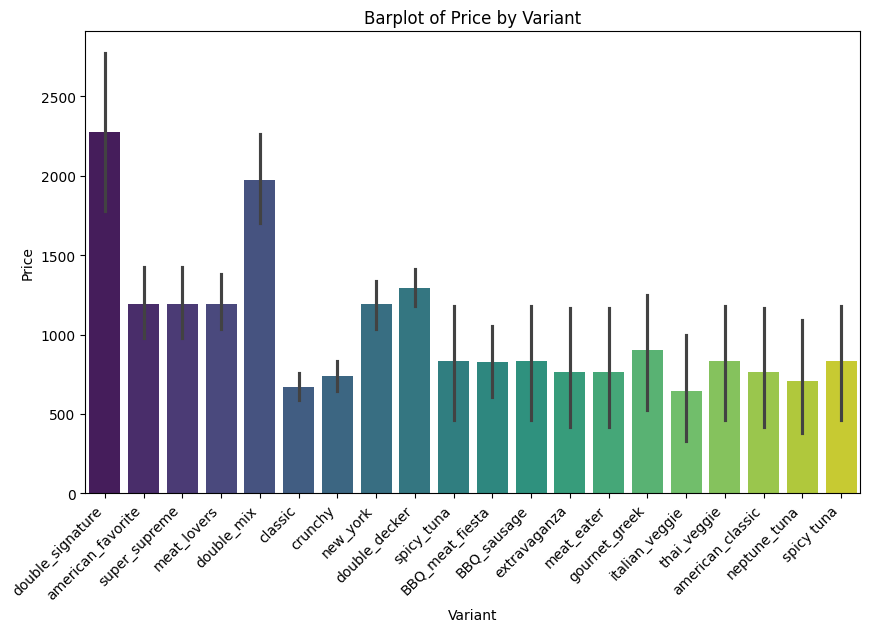

C:\Users\Sumit\AppData\Local\Temp\ipykernel_8960\3672763188.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=x_col, y='Price', palette="viridis")


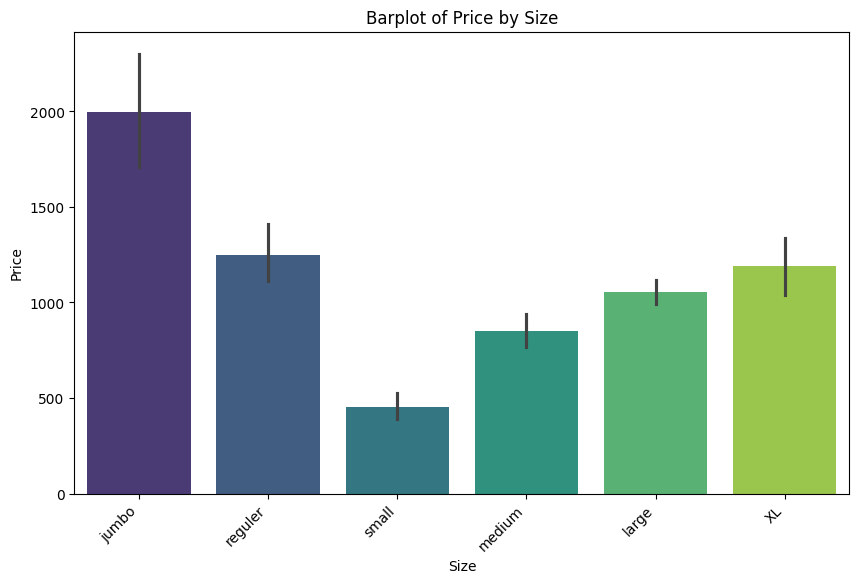

C:\Users\Sumit\AppData\Local\Temp\ipykernel_8960\3672763188.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=x_col, y='Price', palette="viridis")


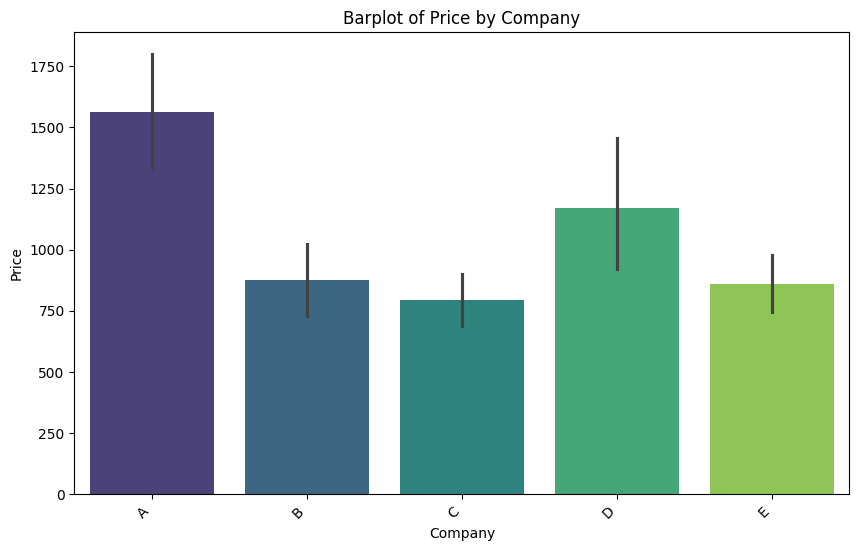

In [58]:
# List of x-axis columns
x_columns = ['diameter', 'topping', 'variant', 'size', 'company']

# Create barplots for each x-axis column
for x_col in x_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x=x_col, y='Price', palette="viridis")
    plt.title(f'Barplot of Price by {x_col.capitalize()}')
    plt.xlabel(x_col.capitalize())
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')  # Adjust if necessary
    plt.show()

C:\Users\Sumit\AppData\Local\Temp\ipykernel_8960\2327528642.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x_col, y='Price', palette="viridis")


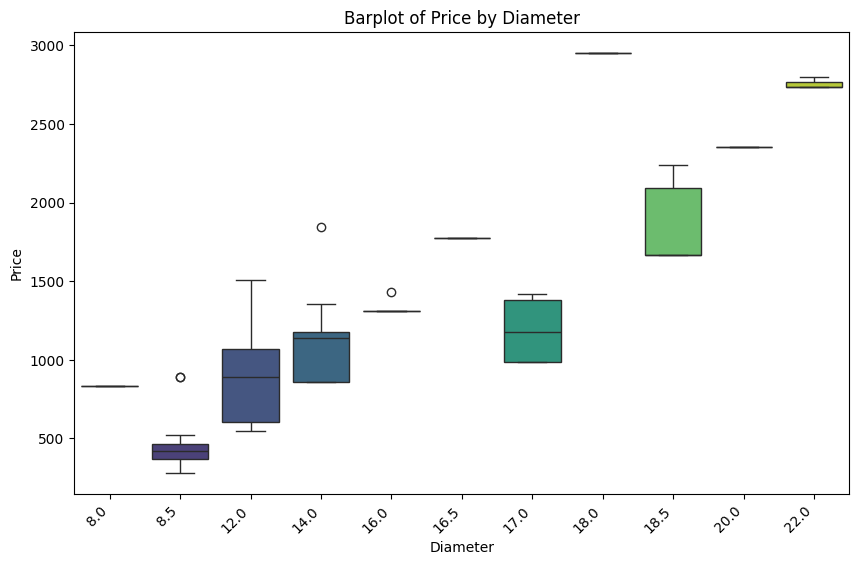

C:\Users\Sumit\AppData\Local\Temp\ipykernel_8960\2327528642.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x_col, y='Price', palette="viridis")


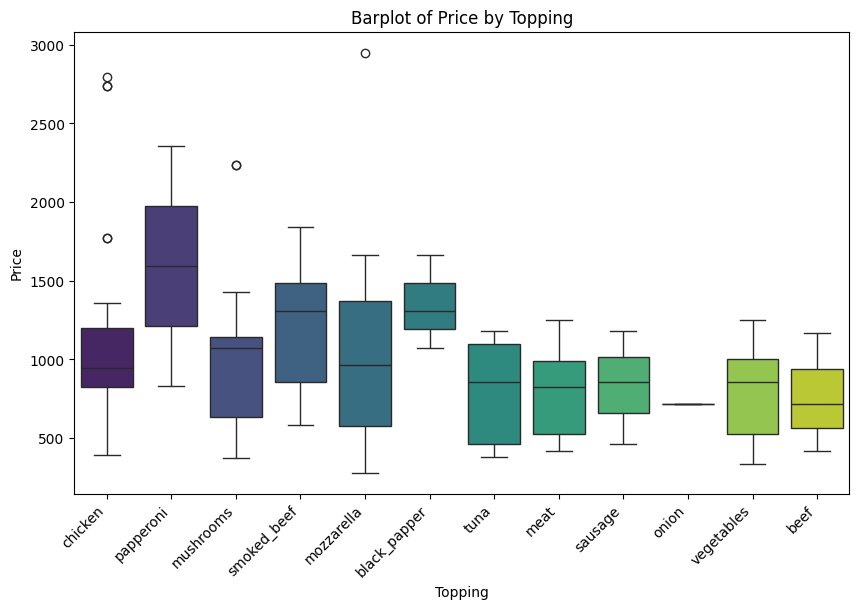

C:\Users\Sumit\AppData\Local\Temp\ipykernel_8960\2327528642.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x_col, y='Price', palette="viridis")


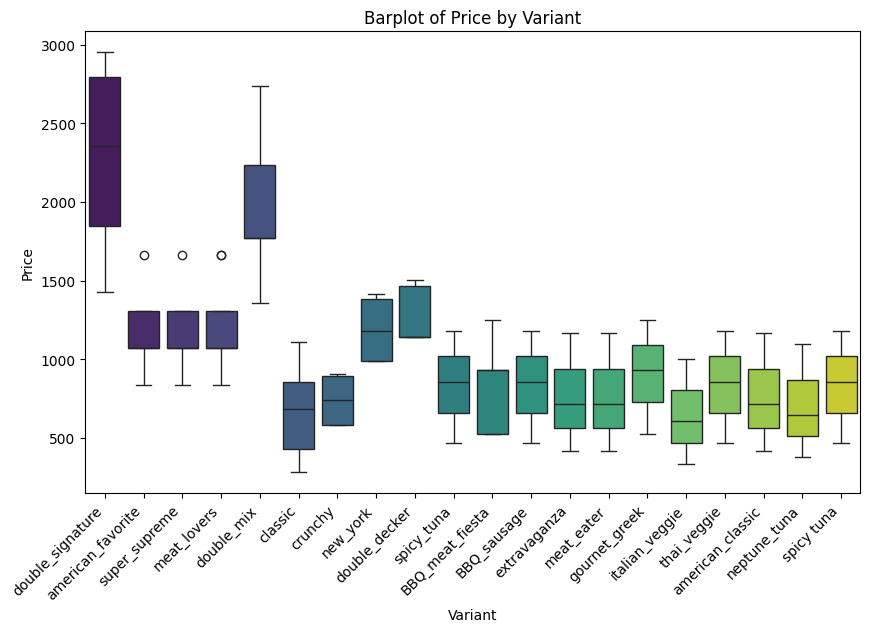

C:\Users\Sumit\AppData\Local\Temp\ipykernel_8960\2327528642.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x_col, y='Price', palette="viridis")


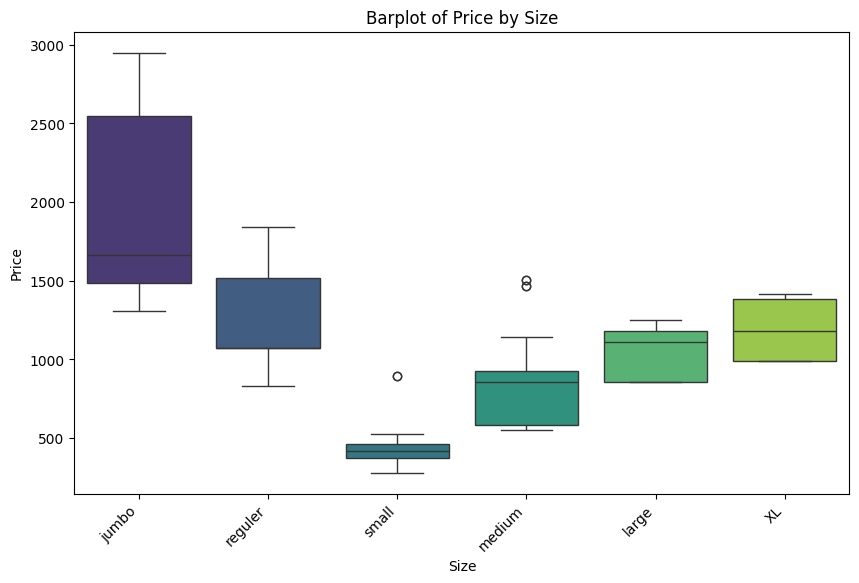

C:\Users\Sumit\AppData\Local\Temp\ipykernel_8960\2327528642.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x_col, y='Price', palette="viridis")


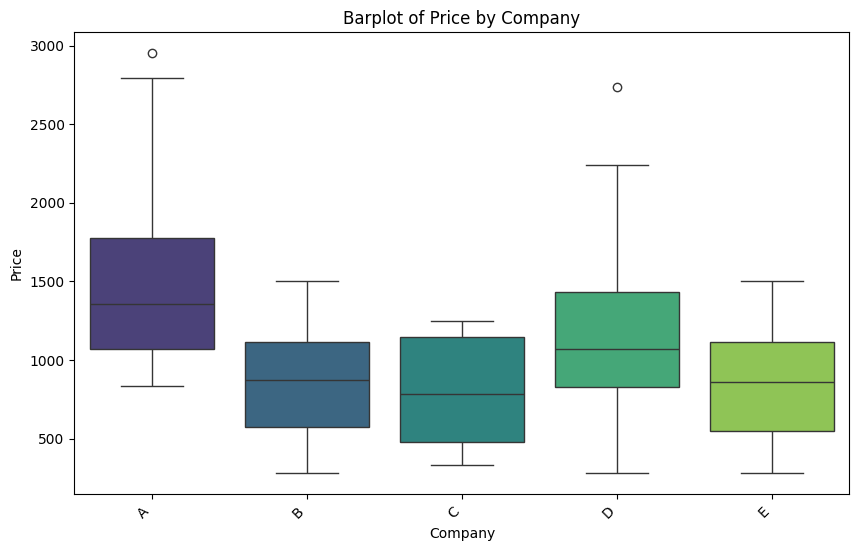

In [59]:
# List of x-axis columns
x_columns = ['diameter', 'topping', 'variant', 'size', 'company']

# Create barplots for each x-axis column
for x_col in x_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=x_col, y='Price', palette="viridis")
    plt.title(f'Barplot of Price by {x_col.capitalize()}')
    plt.xlabel(x_col.capitalize())
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')  # Adjust if necessary
    plt.show()

In [62]:
df[df.Price.max()==df.Price]

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,2951.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [63]:
df[df['size']=='jumbo']['diameter'].head()

0    22.0
1    20.0
4    18.0
5    18.5
6    16.0
Name: diameter, dtype: float32

In [64]:
df[df['size']=='XL']['diameter'].head()


29    17.0
35    17.0
41    17.0
47    17.0
93    17.0
Name: diameter, dtype: float32

In [65]:
df[(df['size']=='jumbo') & (df['diameter']<=16)]

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
6,A,1309.0,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
11,A,1309.0,16.0,black_papper,super_supreme,jumbo,yes,yes,no
16,A,1309.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes
80,D,1309.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,no


In [66]:
df = df.drop(df.index[[6,11,16,80]])

In [67]:
df[(df['size']=='jumbo') & (df['diameter']<=16)]

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms


In [68]:
df.columns

Index(['company', 'Price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [73]:
cat_col = df.select_dtypes(include=['object']).columns

In [71]:
df.head()

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,2796.5,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,2356.2,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,1428.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,1844.5,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,2951.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [74]:
le = LabelEncoder()
for i in  cat_col:
    df[i]=le.fit_transform(df[i])

In [76]:
df.head()

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,2796.5,22.0,2,8,1,1,1,0
1,0,2356.2,20.0,7,8,1,1,1,0
2,0,1428.0,16.0,5,8,4,1,1,1
3,0,1844.5,14.0,9,8,4,1,0,1
4,0,2951.2,18.0,4,8,1,1,0,1


In [77]:
X = df.drop('Price',axis=1)
y = df['Price']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [83]:
df.head()

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,2796.5,22.0,2,8,1,1,1,0
1,0,2356.2,20.0,7,8,1,1,1,0
2,0,1428.0,16.0,5,8,4,1,1,1
3,0,1844.5,14.0,9,8,4,1,0,1
4,0,2951.2,18.0,4,8,1,1,0,1


In [86]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gb.predict(X_test)
y_pred5 = xgb.predict(X_test)

s1 = r2_score(y_test, y_pred1)
s2 = r2_score(y_test, y_pred2)
s3 = r2_score(y_test, y_pred3)
s4 = r2_score(y_test, y_pred4)
s5 = r2_score(y_test, y_pred5)

print(s1, s2, s3, s4, s5)



0.6391199071772933 -0.07847688848532153 0.7189448599193191 0.8172857100027521 0.7307542813679215


In [87]:
final_data = pd.DataFrame({'Model':['LR','SVR','RF','GBR','XGB'],
                           'R2_Score':[s1, s2, s3, s4, s5]})
 
final_data 

,Model,R2_Score
0,LR,0.639120
1,SVR,-0.078477
2,RF,0.718945
3,GBR,0.817286
4,XGB,0.730754


C:\Users\Sumit\AppData\Local\Temp\ipykernel_8960\2688239373.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=final_data, x='Model',y='R2_Score', palette='viridis')


<Axes: xlabel='Model', ylabel='R2_Score'>

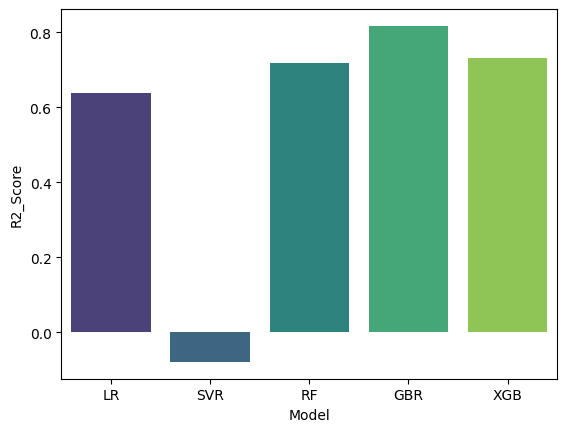

In [89]:
sns.barplot(data=final_data, x='Model',y='R2_Score', palette='viridis')

In [91]:
gb.feature_importances_

array([0.00697334, 0.65343516, 0.0464675 , 0.11139015, 0.15204284,
       0.02360364, 0.00365154, 0.00243583])

In [92]:
fea = pd.Series(gb.feature_importances_, index=X_train.columns)

In [93]:
fea

company            0.006973
diameter           0.653435
topping            0.046467
variant            0.111390
size               0.152043
extra_sauce        0.023604
extra_cheese       0.003652
extra_mushrooms    0.002436
dtype: float64

<Axes: >

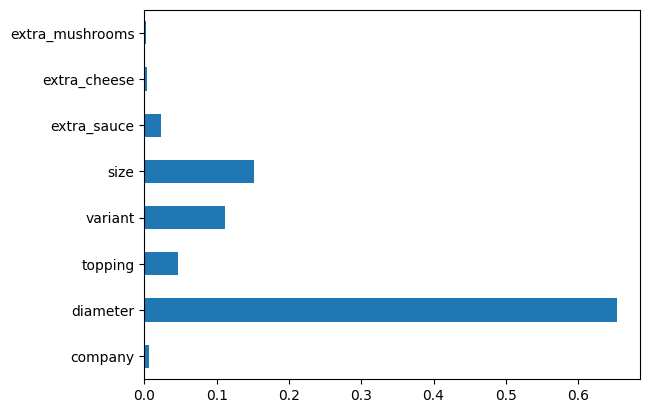

In [95]:
fea.plot(kind='barh')

In [96]:
rf.feature_importances_
fea = pd.Series(rf.feature_importances_, index=X_train.columns)
fea

company            0.016673
diameter           0.637160
topping            0.027326
variant            0.117987
size               0.167418
extra_sauce        0.016631
extra_cheese       0.012169
extra_mushrooms    0.004635
dtype: float64

<Axes: >

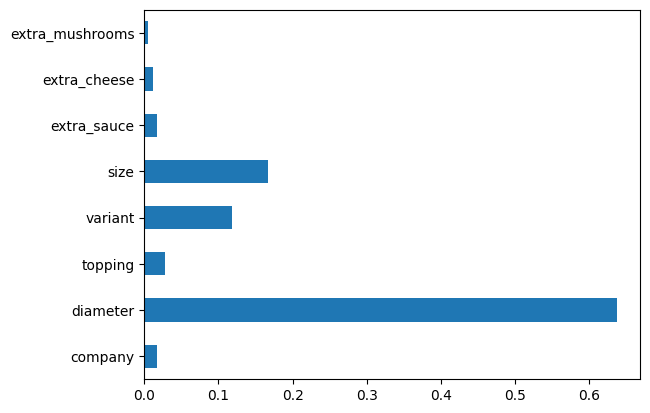

In [97]:
fea.plot(kind='barh')

In [99]:
xgb.feature_importances_
fea = pd.Series(xgb.feature_importances_, index=X_train.columns)
fea

company            0.004243
diameter           0.420623
topping            0.008590
variant            0.069395
size               0.437236
extra_sauce        0.048826
extra_cheese       0.008225
extra_mushrooms    0.002861
dtype: float32

<Axes: >

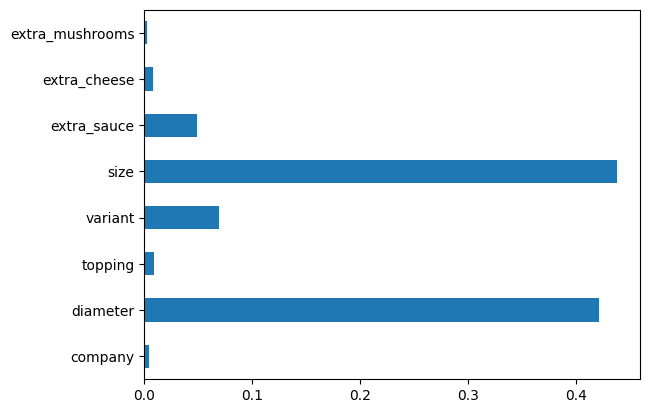

In [100]:
fea.plot(kind='barh')

In [101]:
xgb.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [109]:
joblib.dump(xgb,'joblib/pizza_price_pred_joblib')

['joblib/pizza_price_pred_joblib']

In [1]:
from tkinter import *
import joblib
import pandas as pd
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())

    model = joblib.load('joblib/pizza_price_pred_joblib')
    df = pd.DataFrame({
    'company':p1,
    'diameter':p2,
    'topping':p3,
    'variant':p4,
    'size':p5,
    'extra_sauce':p6,
    'extra_cheese':p7,
    'extra_mushrooms':p8
},index=[0])
    result = model.predict(df)
    
    Label(master, text="Pizza Price is").grid(row=31)
    Label(master, text=result).grid(row=32)
    print("Pizza Price Prediction", result)
    
master =Tk()
master.title("Pizza Price Prediction Using Machine Learning")
label = Label(master,text = "Pizza Price Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Company Name").grid(row=1)
Label(master,text = "Enter Your Diameter of the Pizza").grid(row=2)
Label(master,text = "Topping").grid(row=3)
Label(master,text = "Variant").grid(row=4)
Label(master,text = "Size").grid(row=5)
Label(master,text = "extra_sauce [1:yes,0:No]").grid(row=6)
Label(master,text = "extra_cheese [1:yes,0:No] ").grid(row=7)
Label(master,text = "extra_mushrooms [1:yes,0:No]").grid(row=8)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)

Button(master,text="Predict",command=show_entry).grid()

mainloop()